In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Parameters & Constants

In [24]:
# Parameters
N_0 = [1000, 0, 0, 0, 0]        # Initial number of nuclei
T = [1, 3, 5, 7, np.inf]        # Half-life
T = np.array(T)
lambda_ = np.log(2) / T         # Decay constant
t_eval = np.linspace(0,70,300)  # Time points to evaluate

# Ordinary Differential Equation (ODE)

We solve the ODE:
\begin{equation}
    \frac{dN_{\alpha}}{dt}=\lambda N(t)=\lambda N_0e^{-\lambda t}
\end{equation}

with lambda = ```lambda_ = np.log(2) / T ``` where T = ```T = [1, 3, 5, 7, np.inf]``` for every nucleus (the last nucleus is stable). 

In [25]:
# ODE
def ode_system(lambda_):
    num = len(lambda_)
    
    def dSdt(t, S):
        dndt = np.zeros_like(S)
        for i in range(num):
            if i == 0:
                # First element only loses atoms
                dndt[i] = -lambda_[i] * S[i]
            else:
                # Subsequent elements gain from previous and lose to decay
                dndt[i] = lambda_[i-1] * S[i-1] - lambda_[i] * S[i]
        return dndt
    return dSdt

sol = solve_ivp(ode_system(lambda_), y0=N_0, t_span=(0, 70), t_eval=t_eval)

# Plotting

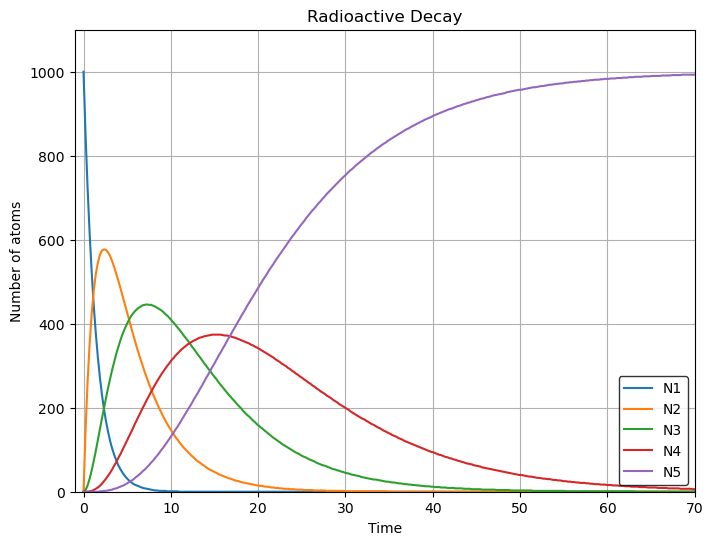

In [27]:
n = len(sol['y'])
plt.figure(figsize=(8, 6))
for i in range(n):
    plt.plot(t_eval, np.round(sol['y'][i]), label=f'N{str(i+1)}')
plt.legend(frameon=True, edgecolor='black', fontsize=10)
plt.title('Radioactive Decay')
plt.xlabel('Time')
plt.ylabel('Number of atoms')
plt.xlim(-1,70)
plt.ylim(0,1100)
plt.grid(True)
plt.show()